In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
input_data = "../data/processed/ecg-id-database-1.0.0/Person_01_rec_1.csv"

with open(input_data, "r") as in_data:
    full_dataset = pd.read_csv(in_data)

In [3]:
ecg_data = full_dataset['ECG_I_filtered'].values

In [4]:
ecg_data

array([-0.115, -0.115, -0.12 , ..., -0.035, -0.035, -0.035])

In [5]:
ecg_data = pd.Series(ecg_data)

<Axes: >

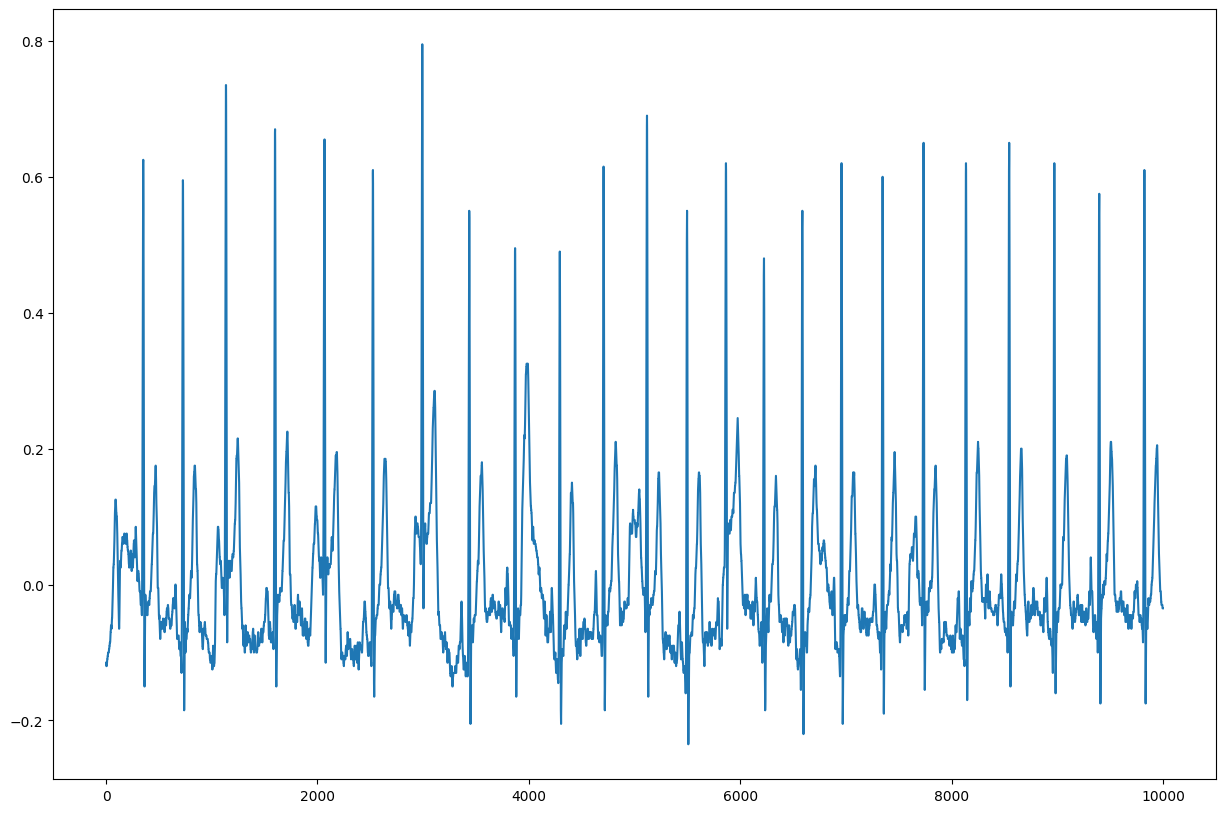

In [6]:
plt.figure(figsize=(15, 10))

ecg_data.plot()

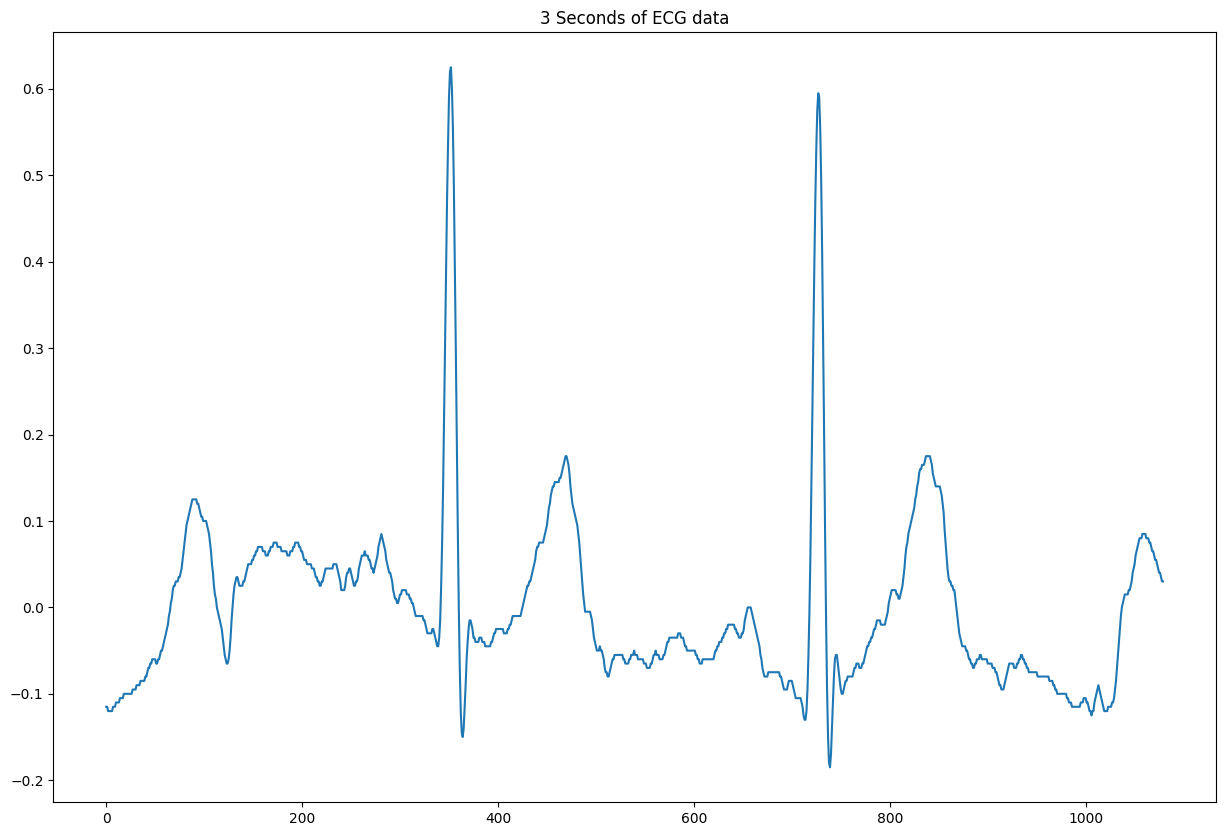

In [7]:
# 3 seconds worth of ECG data
plt.figure(figsize=(15, 10))
ecg_data[:1080].plot()
plt.title("3 Seconds of ECG data")

plt.show()

## Zooming in on one heartbeat

<Axes: >

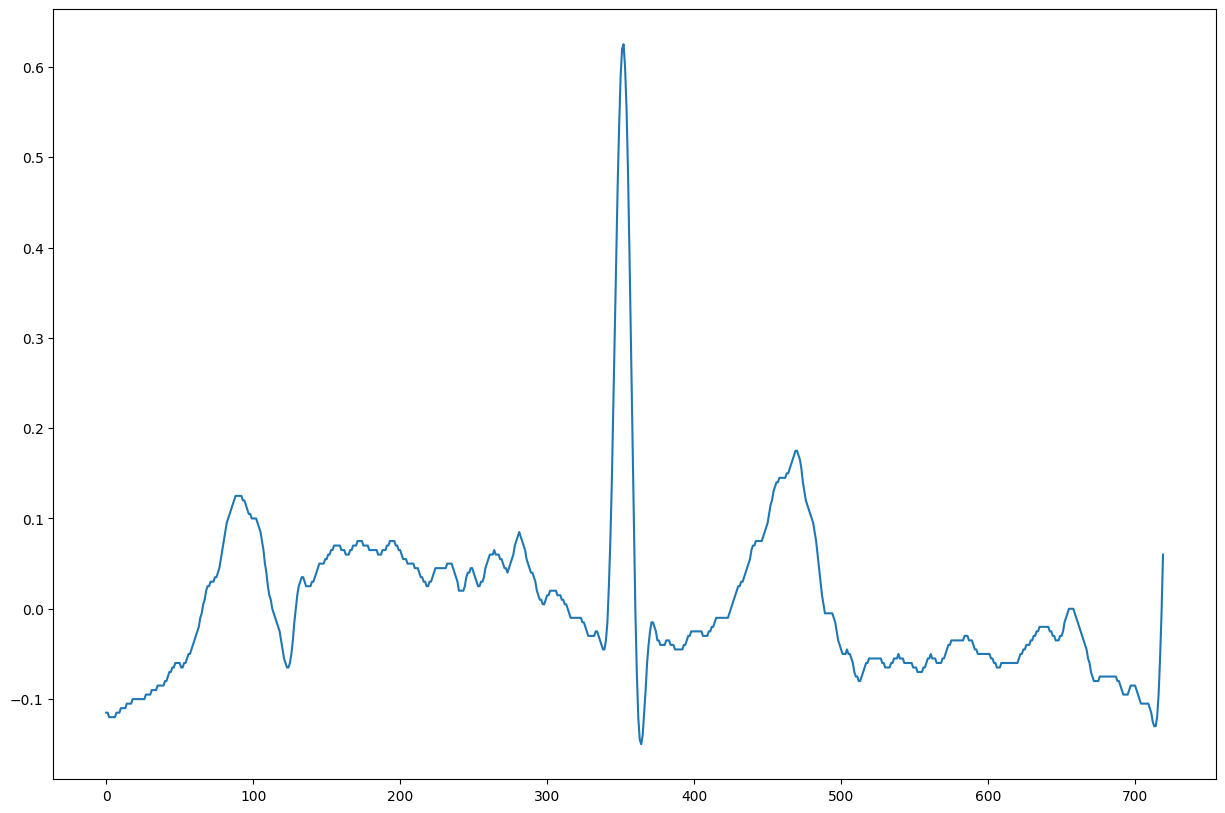

In [8]:
plt.figure(figsize=(15, 10))
ecg_data[:720].plot()

# Labeling the R Waves

In [9]:
# We need a height as a threshold
r_waves, metadata = scipy.signal.find_peaks(ecg_data[:7500], height=0.5)

In [10]:
r_waves

array([ 352,  727, 1134, 1599, 2066, 2525, 2992, 3436, 4707, 5118, 5497,
       5865, 6587, 6958, 7347])

## Plotting each identified R wave

Text(0.5, 1.0, 'Labeled R waves for three seconds')

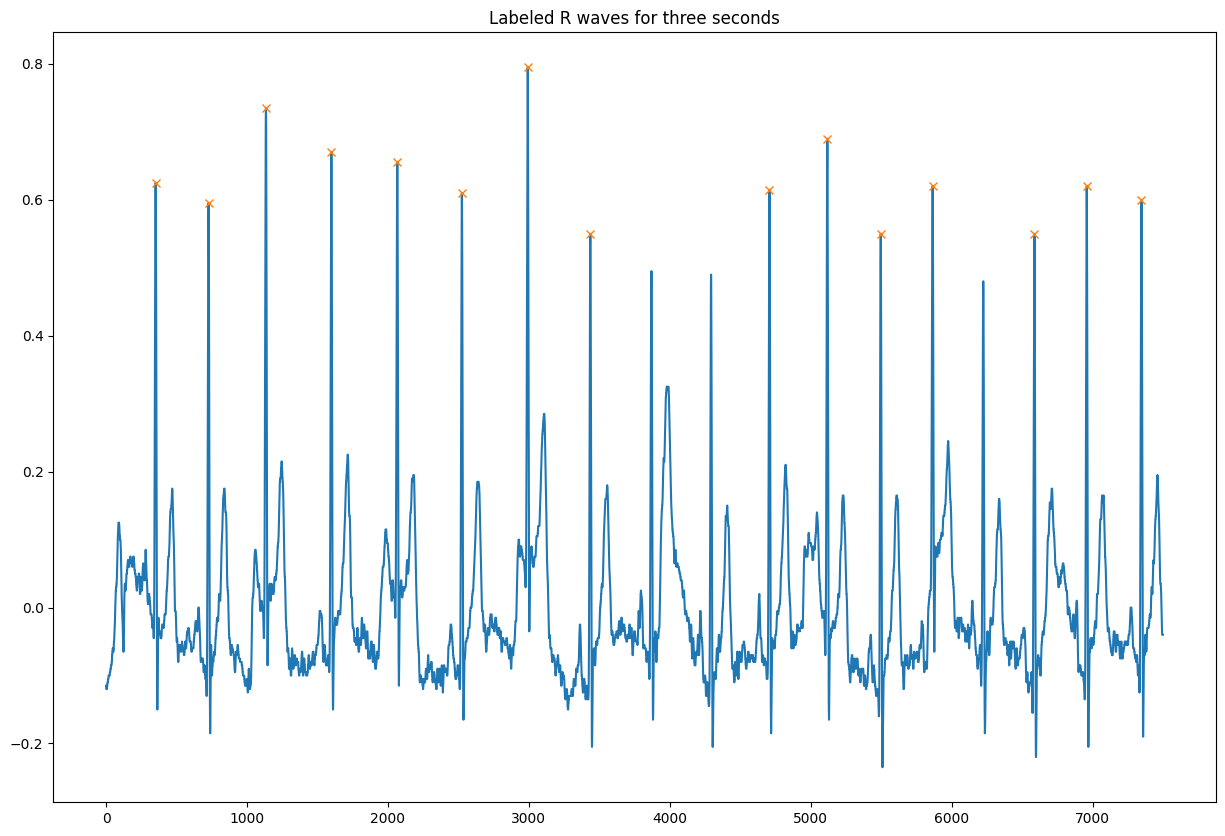

In [11]:
plt.figure(figsize=(15, 10))

three_second_ecg = ecg_data[:7500]

plt.plot(three_second_ecg)
plt.plot(r_waves, three_second_ecg[r_waves], "x")
plt.title("Labeled R waves for three seconds")

## Flattening the ECG

<Axes: >

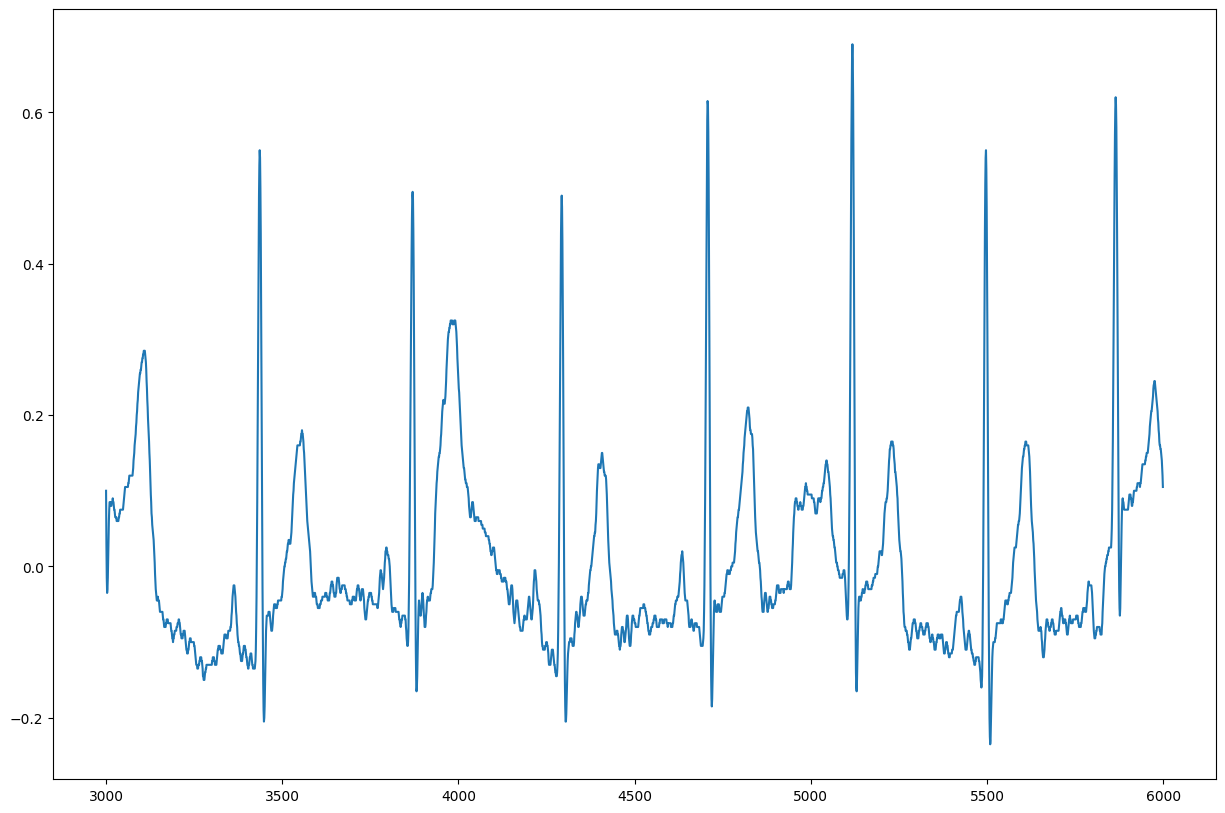

In [12]:
plt.figure(figsize=(15, 10))
ecg_data[3000:6000].plot()

Text(0.5, 1.0, '20 seconds of ECG data')

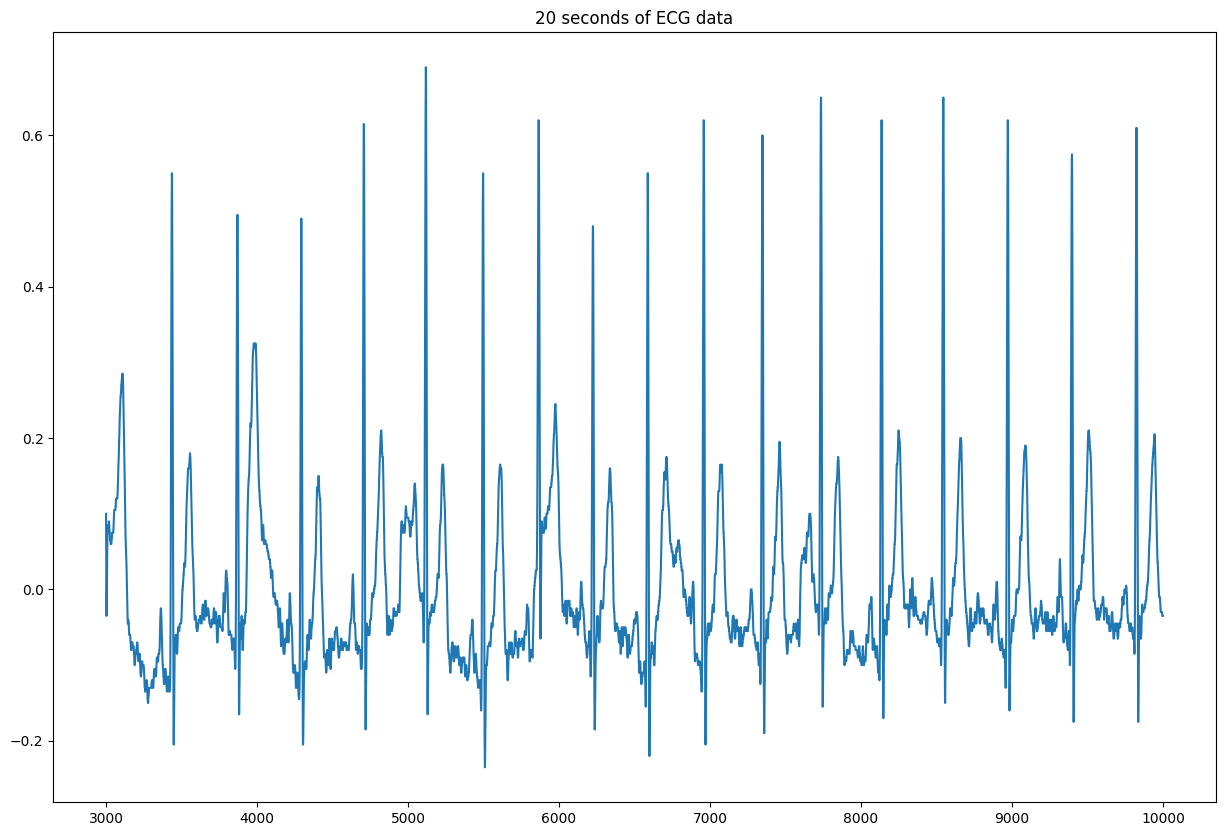

In [13]:
plt.figure(figsize=(15, 10))

ecg_20_seconds = ecg_data[3000:10200]
ecg_20_seconds.plot()
plt.title("20 seconds of ECG data")

In [14]:
wandering_baseline = scipy.signal.medfilt(ecg_20_seconds, kernel_size=361)

In [15]:
wandering_baseline = pd.Series(wandering_baseline)

<Axes: >

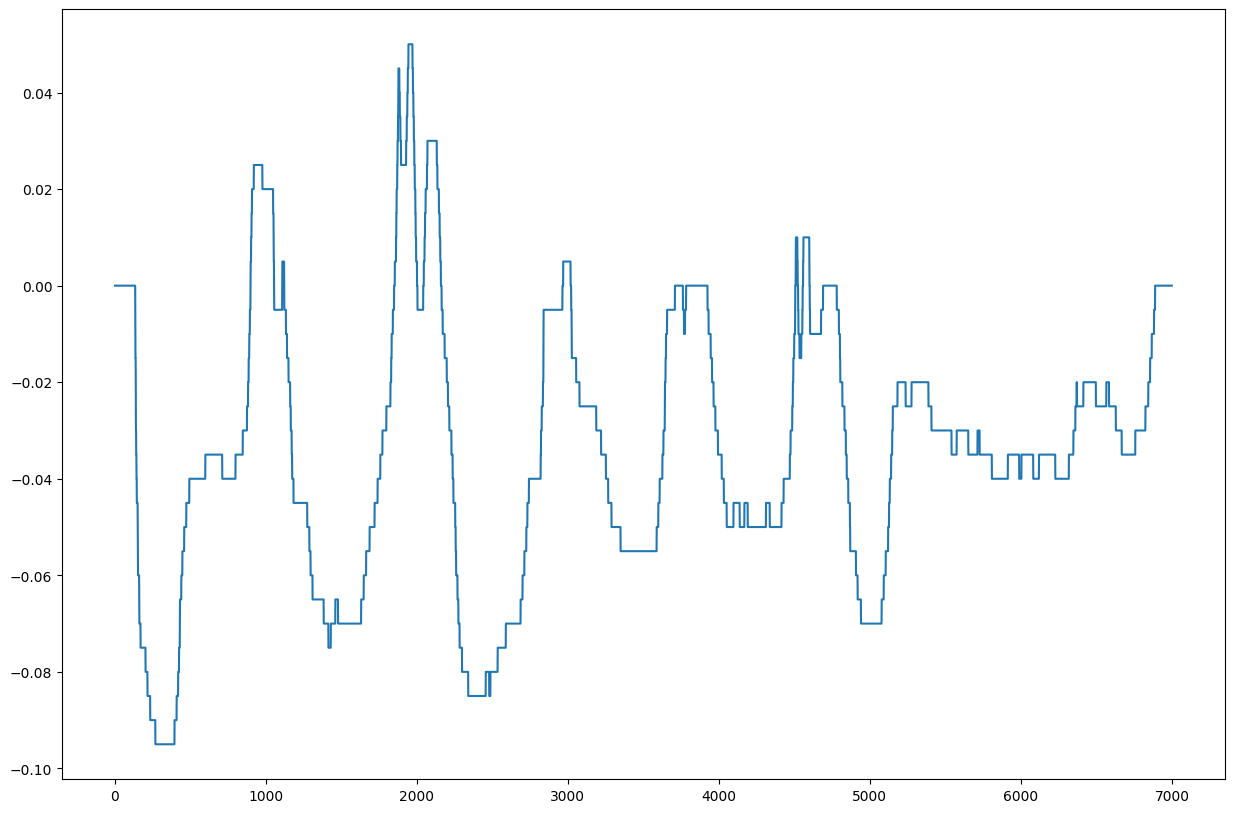

In [16]:
plt.figure(figsize=(15, 10))

wandering_baseline.plot()

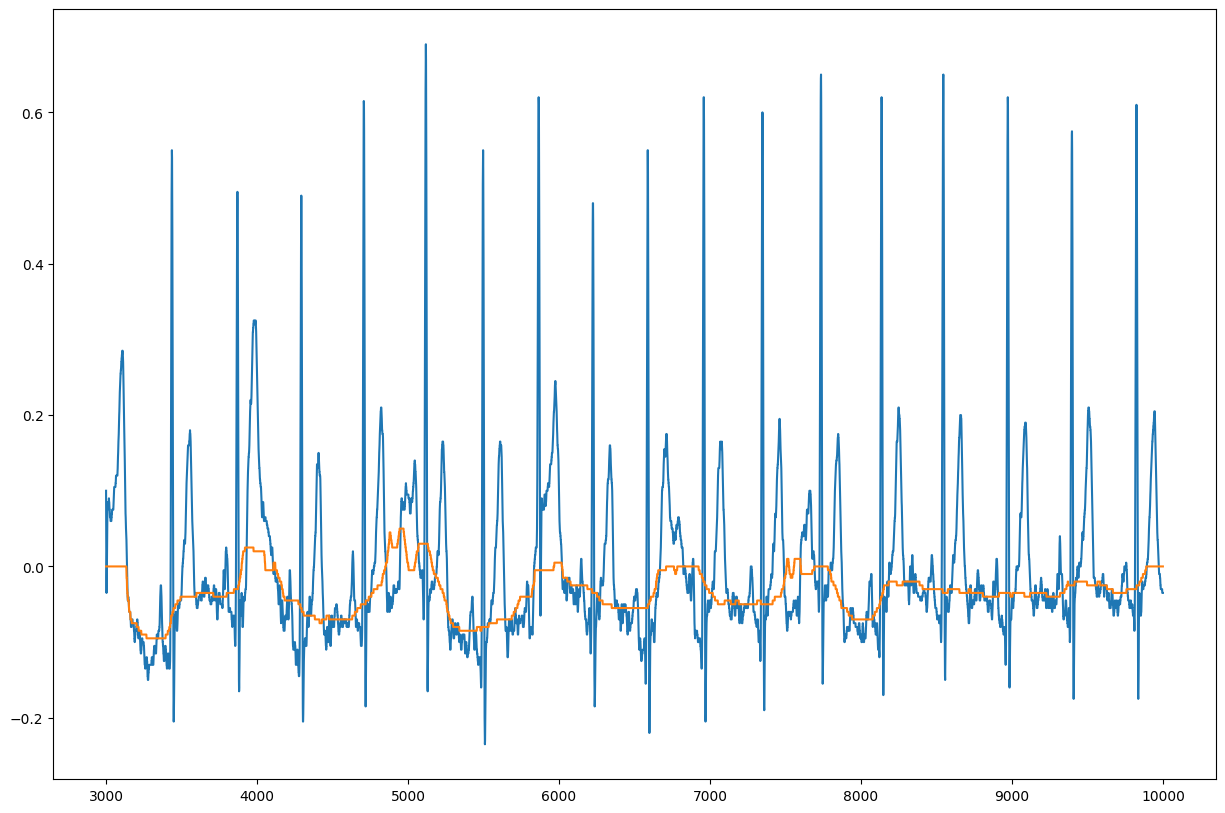

In [17]:
plt.figure(figsize=(15, 10))

wandering_baseline.index += 3000

ecg_20_seconds.plot()
plt.plot(wandering_baseline)

In [18]:
flattened_ecg = ecg_20_seconds - wandering_baseline

<Axes: >

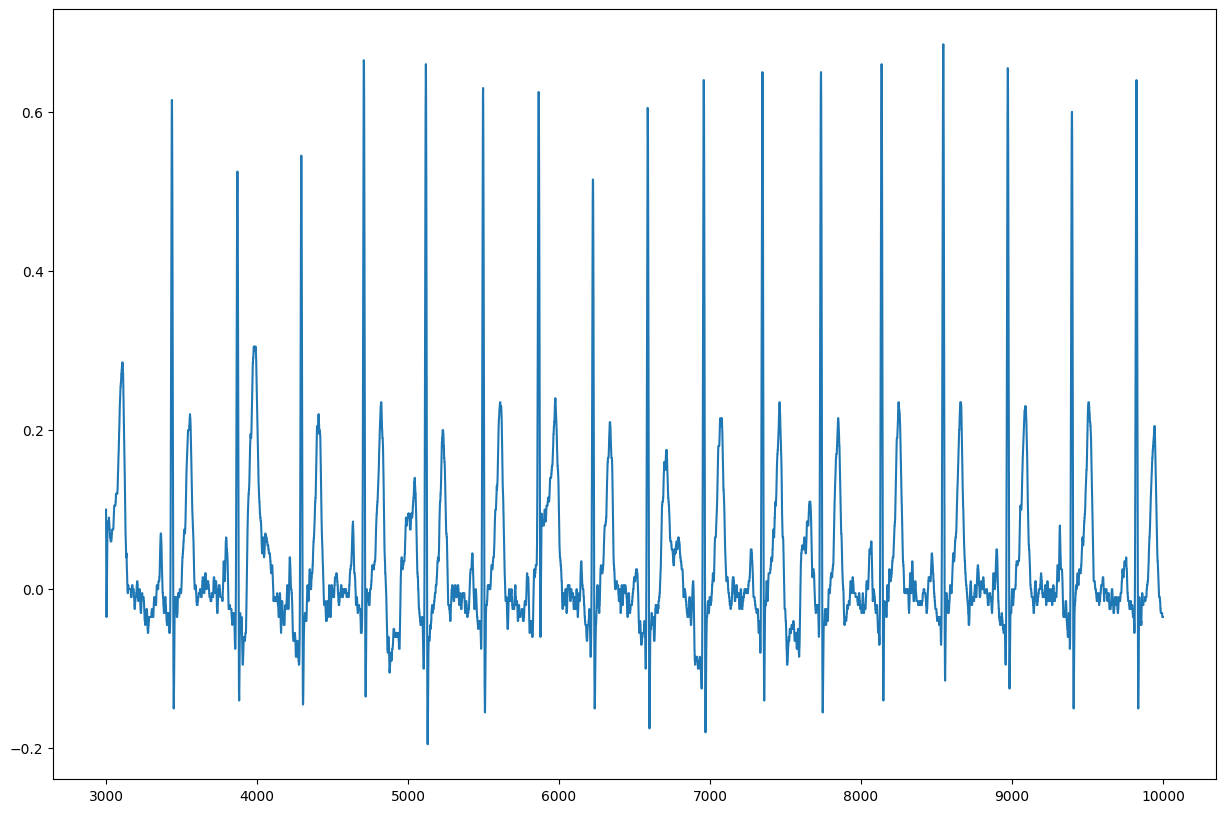

In [19]:
plt.figure(figsize=(15, 10))

flattened_ecg.plot()

## Labeling all of R waves

In [20]:
r_waves, metadata = scipy.signal.find_peaks(flattened_ecg, height=0.5, distance=30)

In [21]:
r_waves += 3000

In [22]:
r_waves

array([3436, 3870, 4293, 4707, 5118, 5497, 5865, 6224, 6587, 6958, 7347,
       7735, 8136, 8545, 8972, 9397, 9824])

Text(0.5, 1.0, '20 second ECG with labeled R waves')

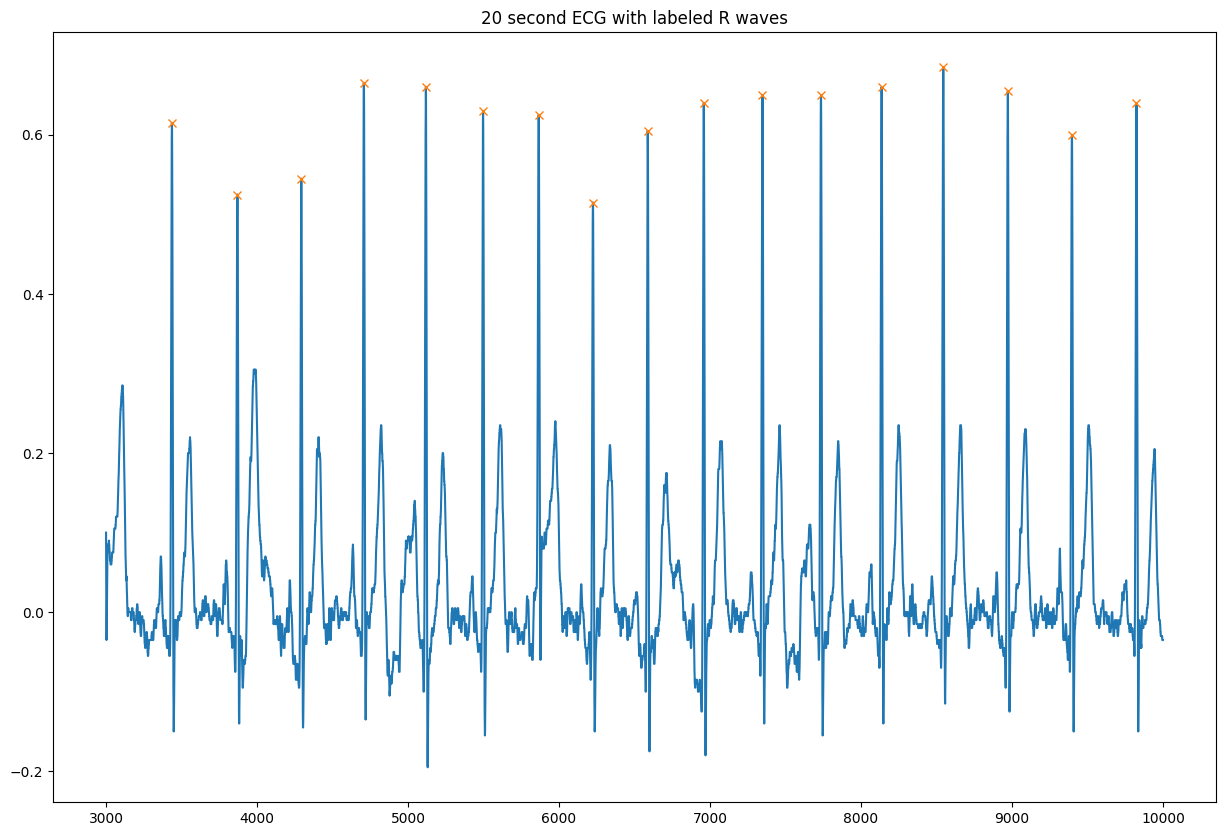

In [23]:
plt.figure(figsize=(15, 10))

flattened_ecg.plot()
plt.plot(r_waves, flattened_ecg[r_waves], "x")
plt.title("20 second ECG with labeled R waves")

In [24]:
frequency = 360
seconds = 20
heartbeats = len(r_waves)
heartbeats

17

## Sections

### Plotting the dataset

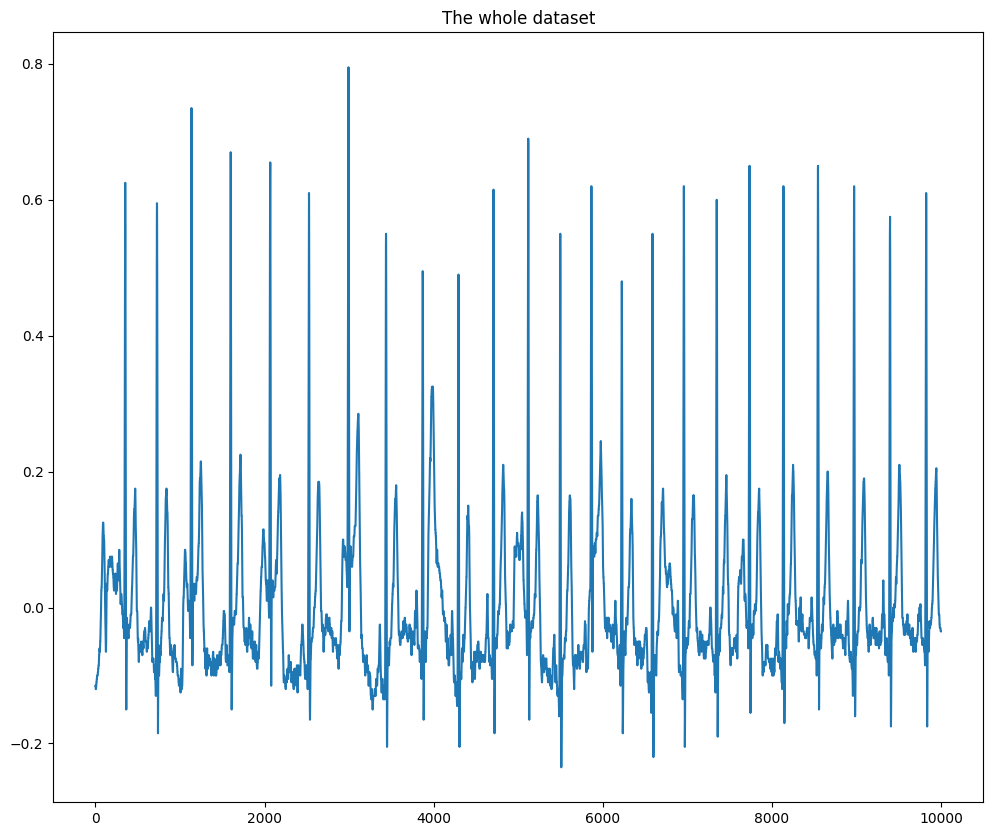

In [25]:
plt.figure(figsize=(12, 10))

ecg_data.plot()
plt.title("The whole dataset")
plt.show()

<Axes: >

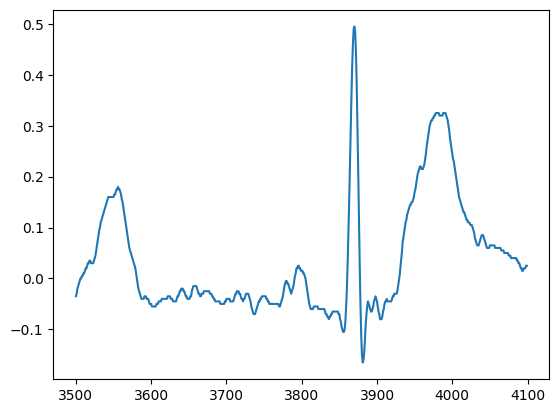

In [26]:
ecg_data[3500:4100].plot()

## Label the R Waves (pre-smoothing)

In [27]:
six_qrs = ecg_data[3500:6000]
r_waves, metadata = scipy.signal.find_peaks(six_qrs, height=0.45)
r_waves += 3500
r_waves

array([3870, 4293, 4707, 5118, 5497, 5865])

Text(0.5, 1.0, '6 heartbeats with labeled R waves')

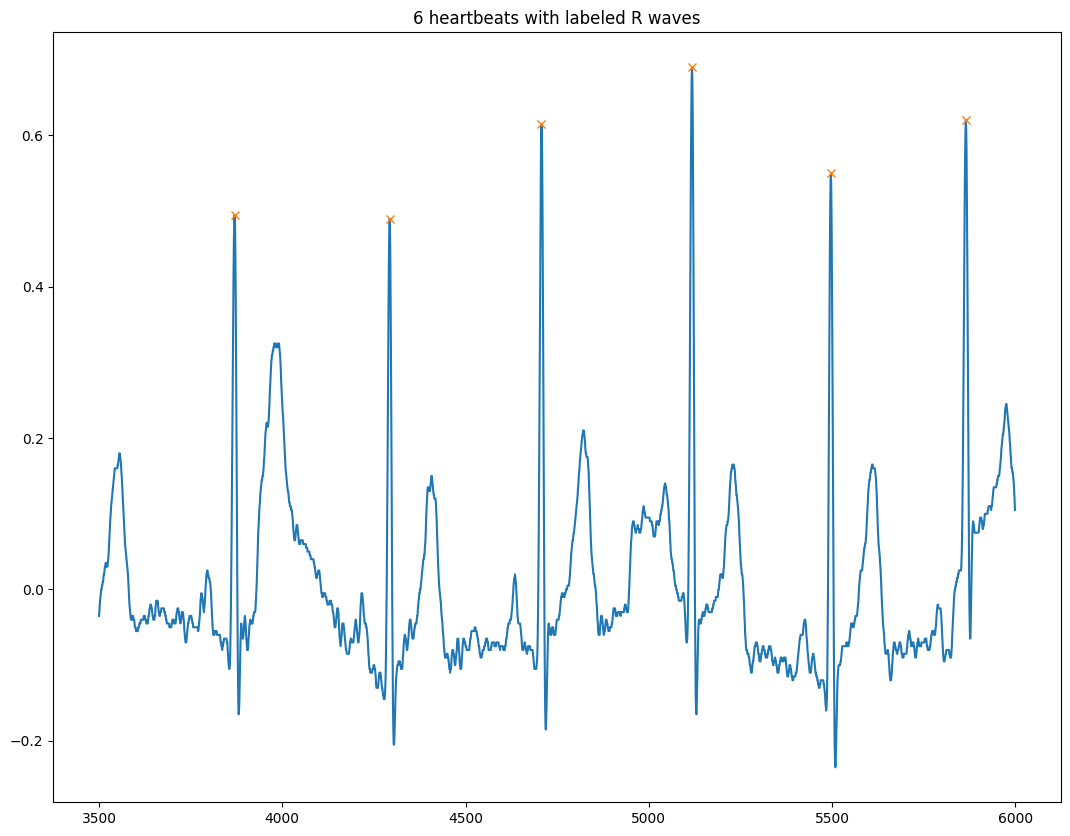

In [31]:
plt.figure(figsize=(13, 10))
six_qrs.plot()
plt.plot(r_waves, six_qrs[r_waves], "x")
plt.title("6 heartbeats with labeled R waves")

## Smooth the 6 QRS Complex

Text(0.5, 1.0, 'Smoothed Heartbeats')

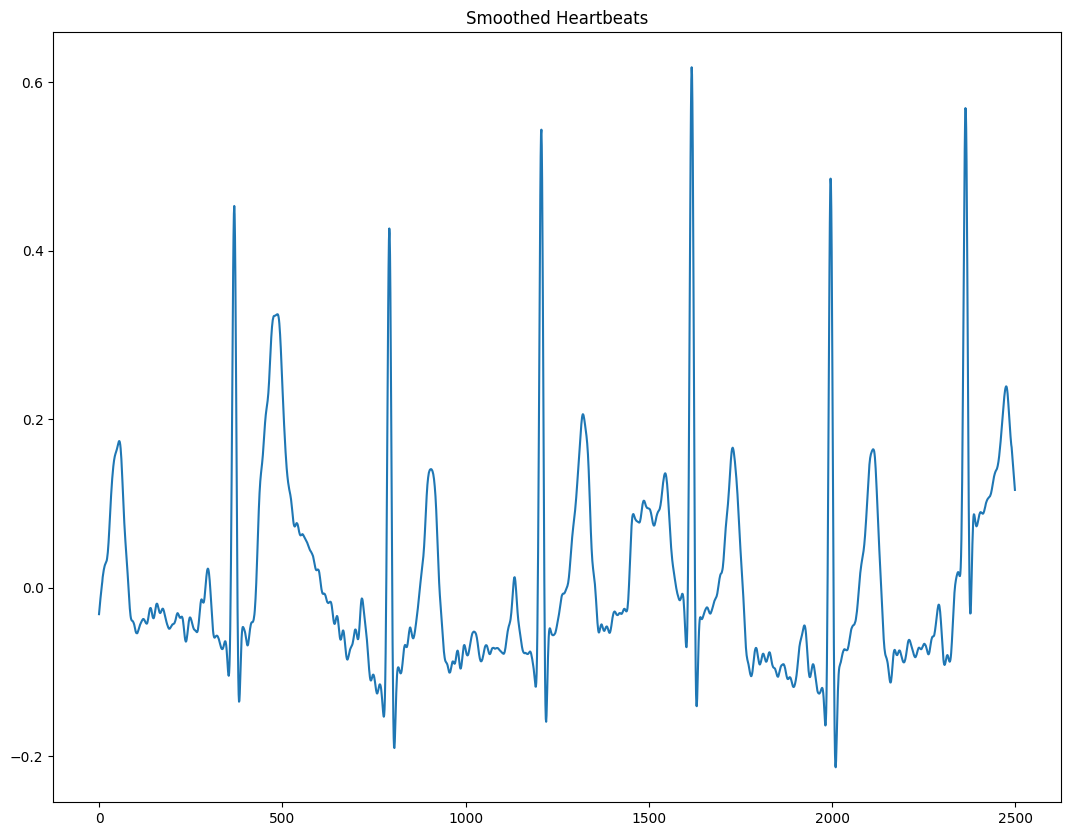

In [106]:
smoothed_heartbeats = scipy.signal.savgol_filter(six_qrs, window_length=20, polyorder=2)

plt.figure(figsize=(13, 10))
pd.Series(smoothed_heartbeats).plot()
plt.title("Smoothed Heartbeats")

In [113]:
r_waves_2, metadata = scipy.signal.find_peaks(smoothed_heartbeats, height=0.4, distance=30)

In [118]:
print(f"{r_waves_2} \n{smoothed_heartbeats[r_waves_2]}")

[ 369  792 1207 1617 1996 2364] 
[0.45325758 0.42650189 0.5438428  0.61793371 0.48570644 0.56943939]


Text(0.5, 1.0, 'An R-R Interval')

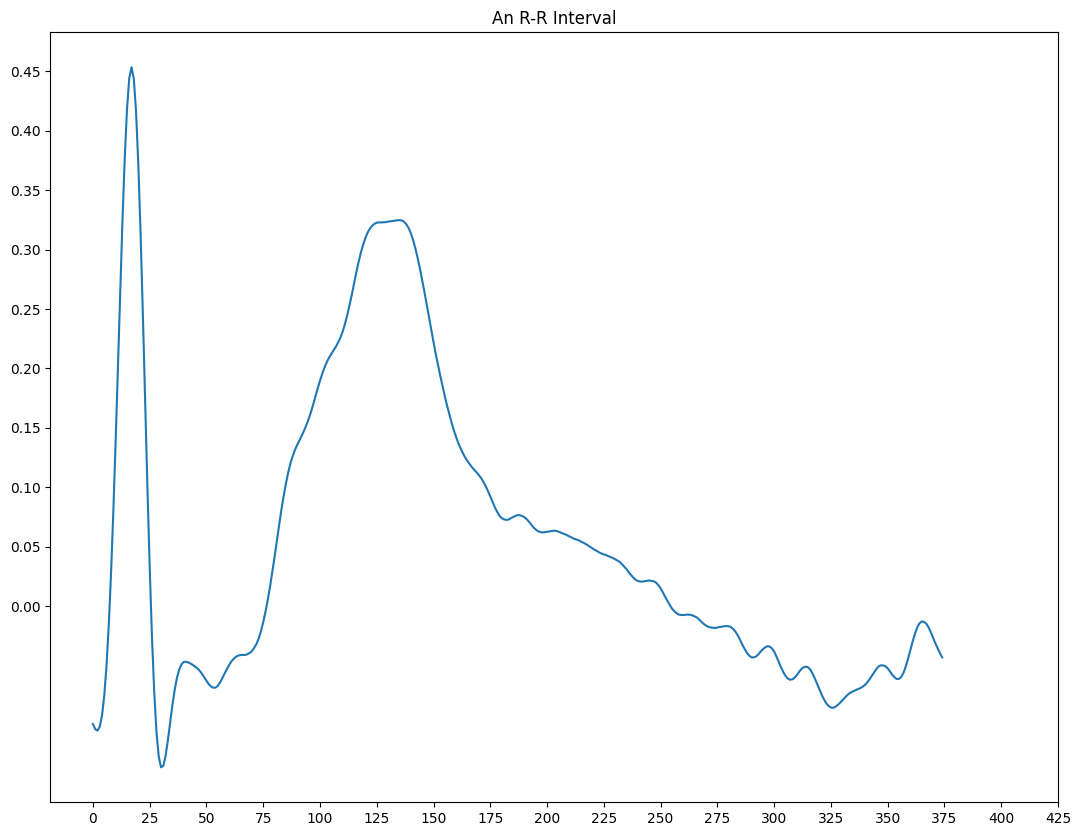

In [132]:
plt.figure(figsize=(13, 10))
# rr_interval = smoothed_heartbeats[369:792]
rr_interval = smoothed_heartbeats[352:727]
rr_interval = pd.Series(rr_interval)
rr_interval.plot()

plt.yticks(np.arange(0, 0.5, 0.05))
plt.xticks(np.arange(0, 450, 25))
plt.title("An R-R Interval")

## Label P and T Waves in the RR Interval

In [126]:
waves, metadata = scipy.signal.find_peaks(rr_interval, height=[-0.1, 0.325], distance=200)
waves
t_wave = waves[0]
p_wave = waves[-1]

print(f"T Waves: {t_wave}")
print(f"P Waves: {p_wave}")

T Waves: 118
P Waves: 348


Text(0.5, 1.0, 'RR Interval with P and T Waves Labeled')

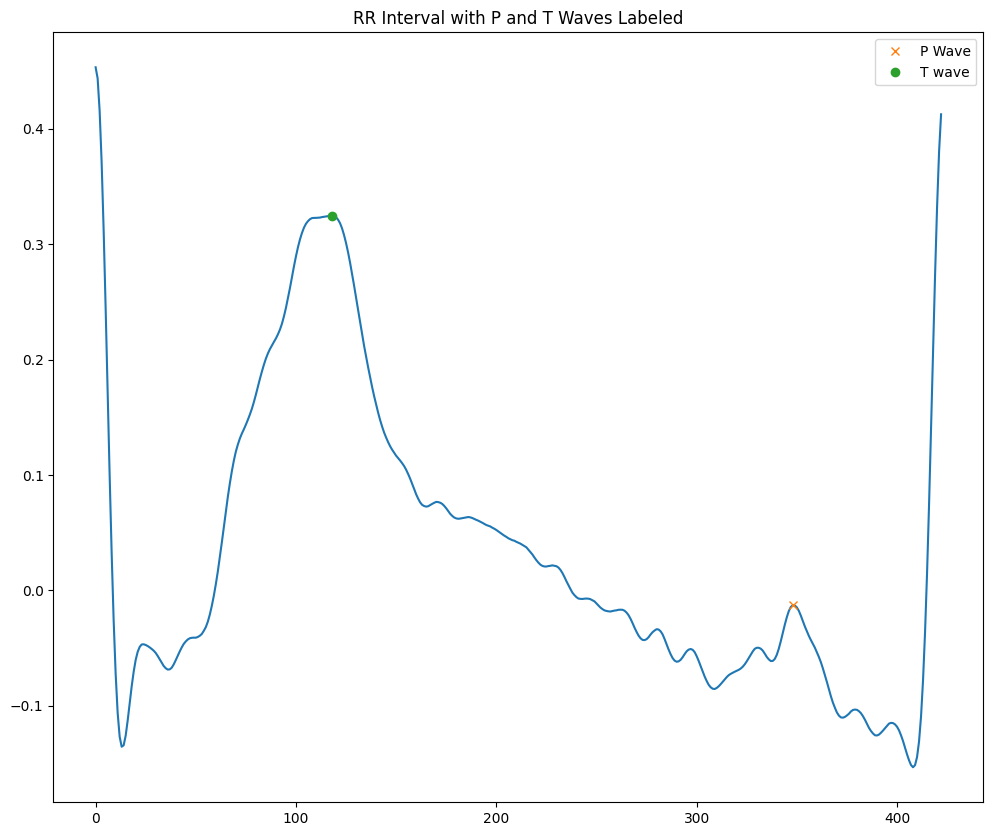

In [127]:
plt.figure(figsize=(12, 10))

rr_interval.plot()
plt.plot(p_wave, rr_interval[p_wave], "x", label="P Wave")
plt.plot(t_wave, rr_interval[t_wave], "o", label="T wave")
plt.legend()
# plt.yticks(np.arange(-0.25, 0.8, 0.05))
# plt.xticks(np.arange(0, 350, 25))
plt.title("RR Interval with P and T Waves Labeled")

## Find the Q and S waves

In [129]:
rightmost_data = rr_interval[375:450]
rightmost_data = pd.Series(rightmost_data)

s_wave = rightmost_data.idxmin(axis=0)
s_wave

408

In [130]:
leftmost_data = rr_interval[300:375]
leftmost_data = pd.Series(leftmost_data)

q_wave = leftmost_data.idxmin(axis=0)
q_wave

373

Text(0.5, 1.0, 'P, Q, S, and T waves labeled')

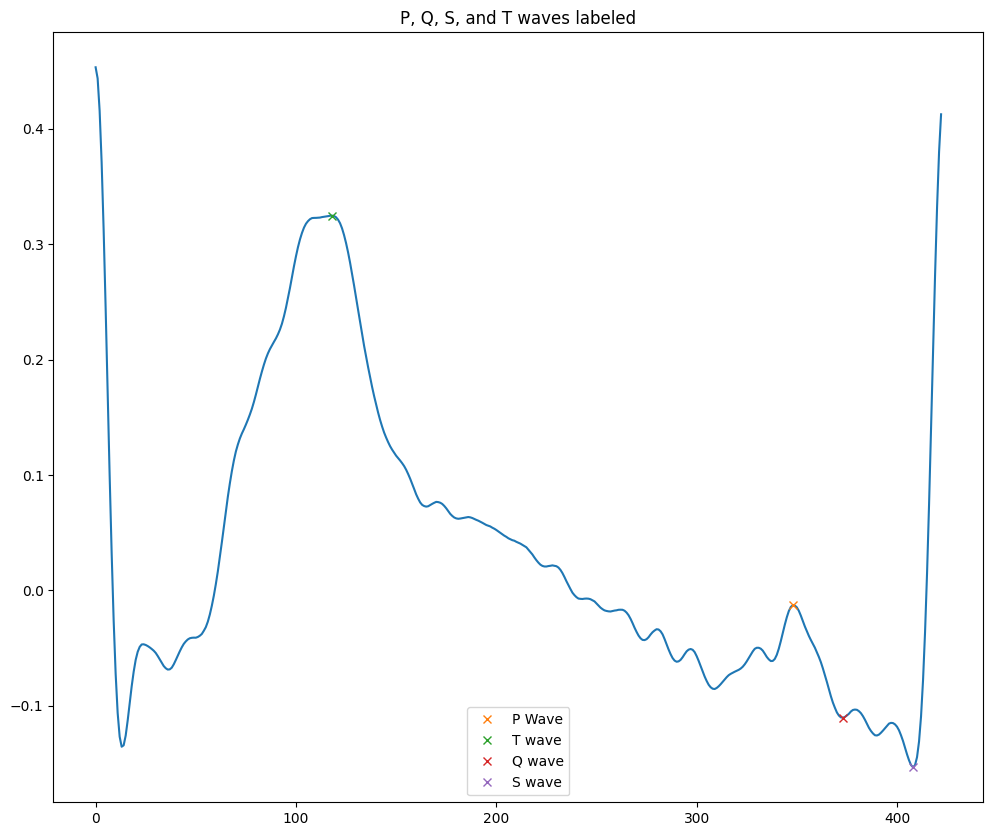

In [131]:
plt.figure(figsize=(12, 10))

rr_interval.plot()
plt.plot(p_wave, rr_interval[p_wave], "x", label="P Wave")
plt.plot(t_wave, rr_interval[t_wave], "x", label="T wave")
plt.plot(q_wave, rr_interval[q_wave], "x", label="Q wave")
plt.plot(s_wave, rr_interval[s_wave], "x", label="S wave")
plt.legend()
plt.title("P, Q, S, and T waves labeled")

# SciPy EKG Data

In [52]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
ekg = scipy.datasets.electrocardiogram()

In [54]:
ekg = pd.Series(ekg)

<Axes: >

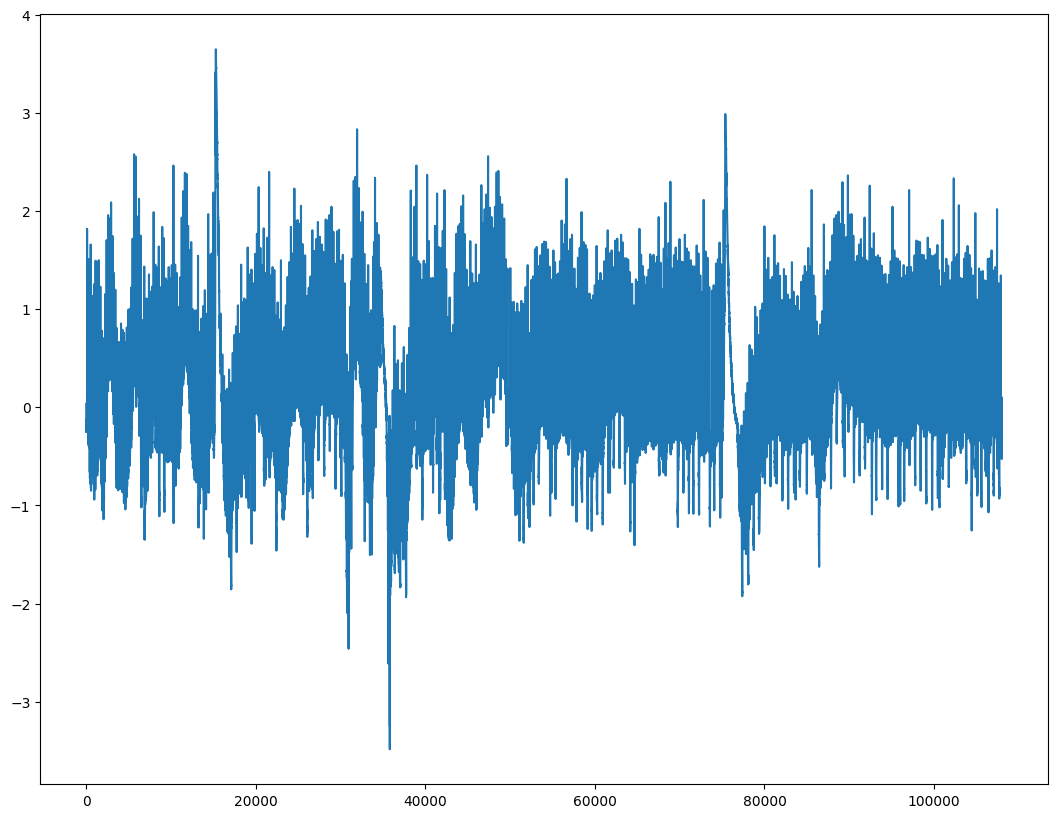

In [55]:
plt.figure(figsize=(13, 10))
ekg.plot()

Text(0.5, 1.0, '3 seconds of EKG data')

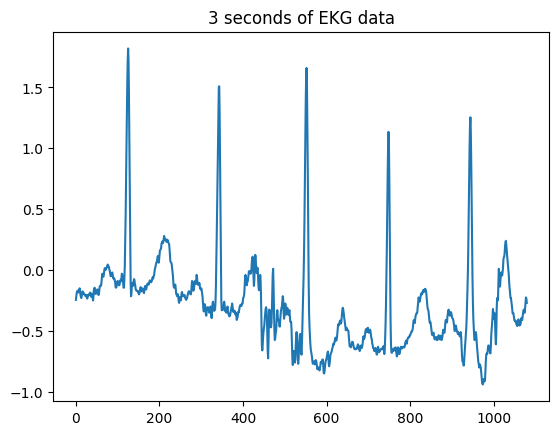

In [56]:
ekg[:1080].plot()
plt.title("3 seconds of EKG data")

<Axes: >

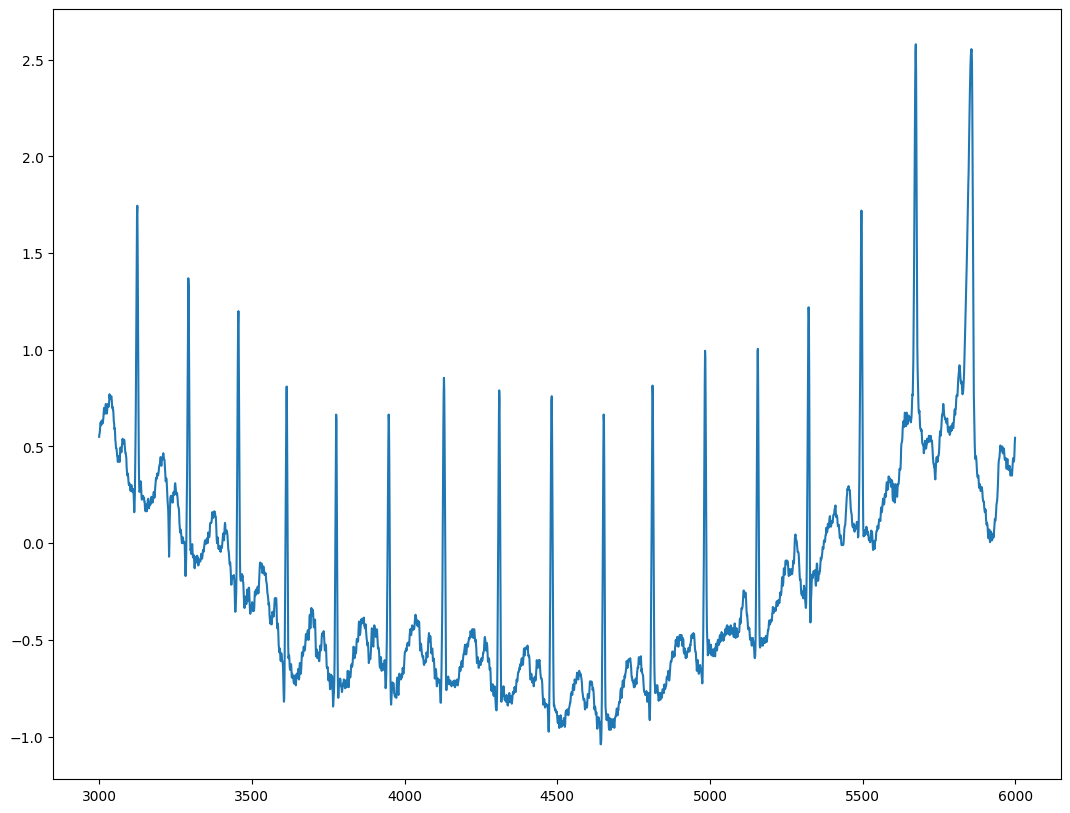

In [57]:
plt.figure(figsize=(13, 10))
ekg[3000:6000].plot()

Text(0.5, 1.0, '20 seconds of EKG data')

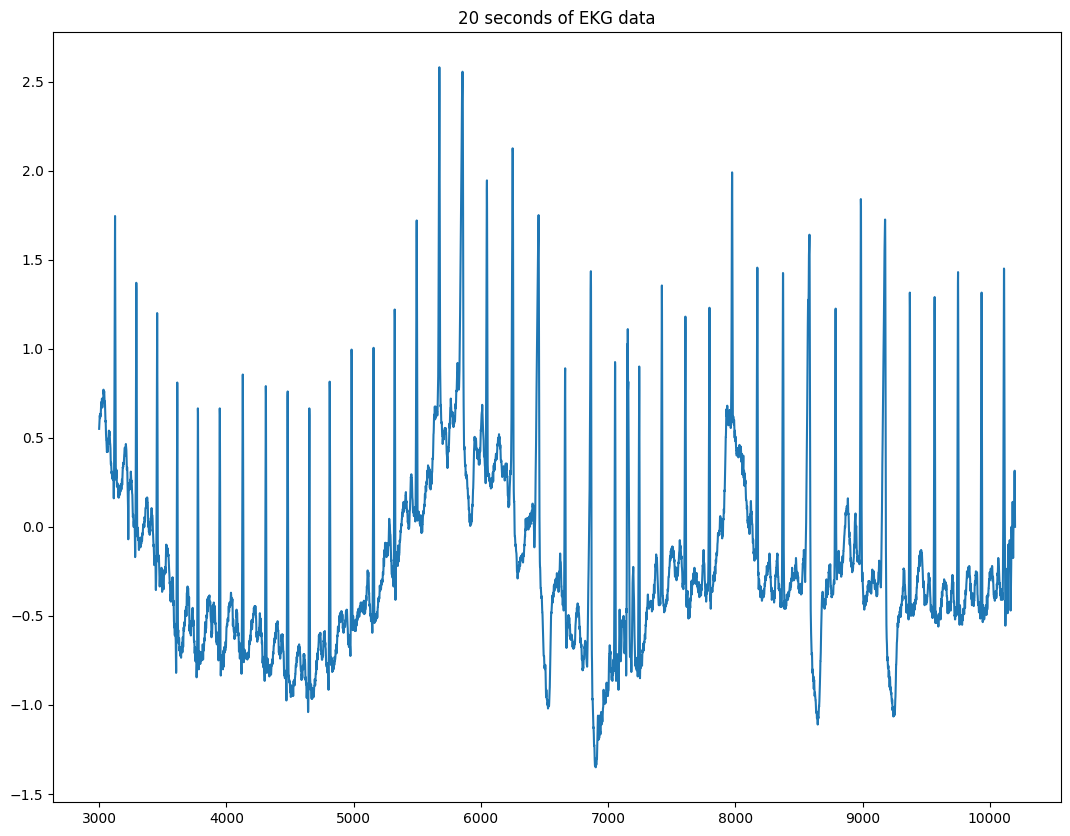

In [70]:
plt.figure(figsize=(13, 10))

ekg_20_seconds = ekg[3000:10200]
ekg_20_seconds.plot()
plt.title("20 seconds of EKG data")

In [71]:
wandering_baseline = scipy.signal.medfilt(ekg_20_seconds, kernel_size=361)

In [72]:
wandering_baseline = pd.Series(wandering_baseline)

<Axes: >

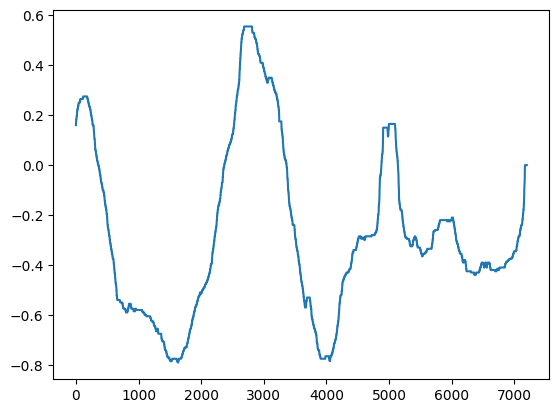

In [73]:
wandering_baseline.plot()

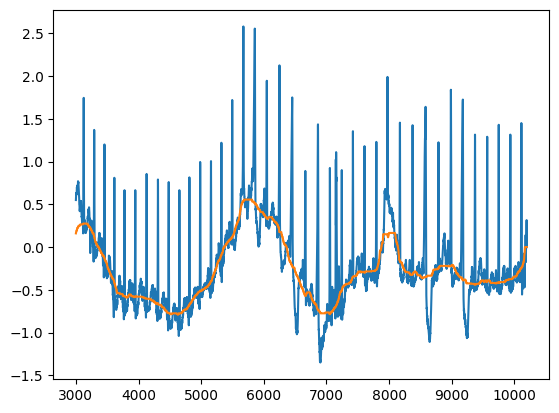

In [74]:
wandering_baseline.index += 3000

ekg_20_seconds.plot()
plt.plot(wandering_baseline)

In [75]:
flattened_ekg = ekg_20_seconds - wandering_baseline

<Axes: >

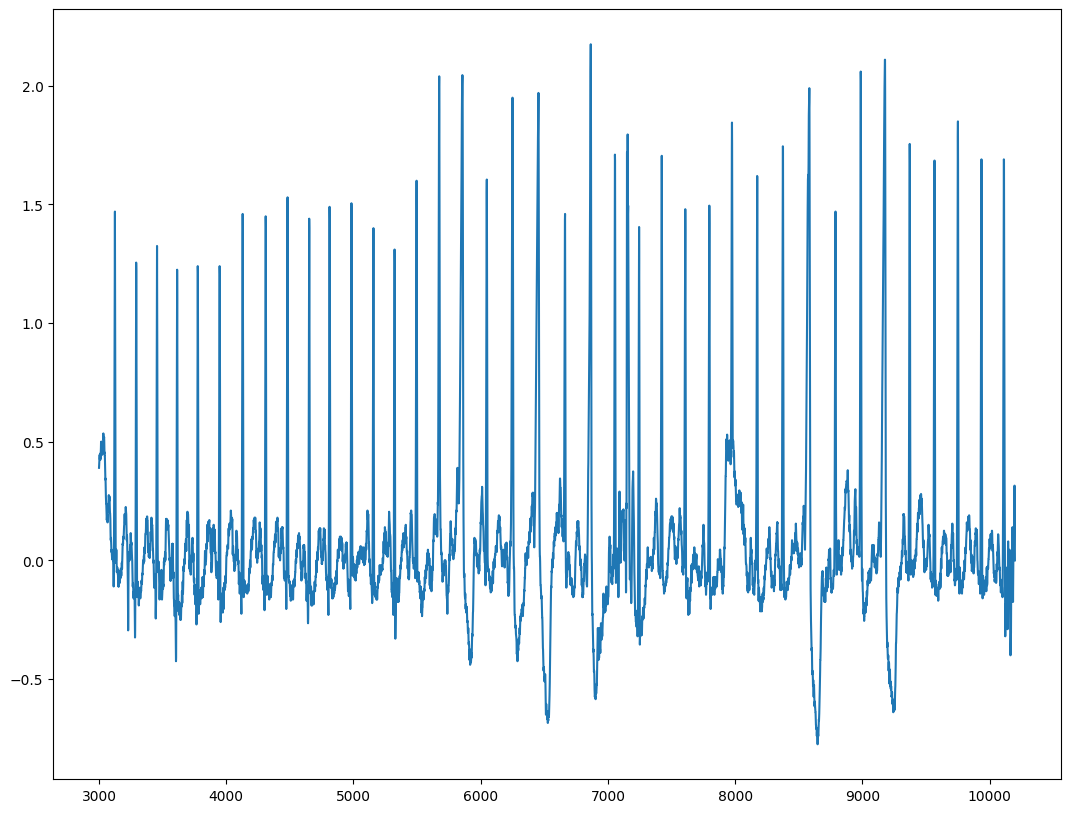

In [77]:
plt.figure(figsize=(13, 10))

flattened_ekg.plot()

In [78]:
r_waves, metadata = scipy.signal.find_peaks(flattened_ekg, height=1.0, distance=30)

In [79]:
r_waves += 3000

Text(0.5, 1.0, '20 second EKG with labeled R waves')

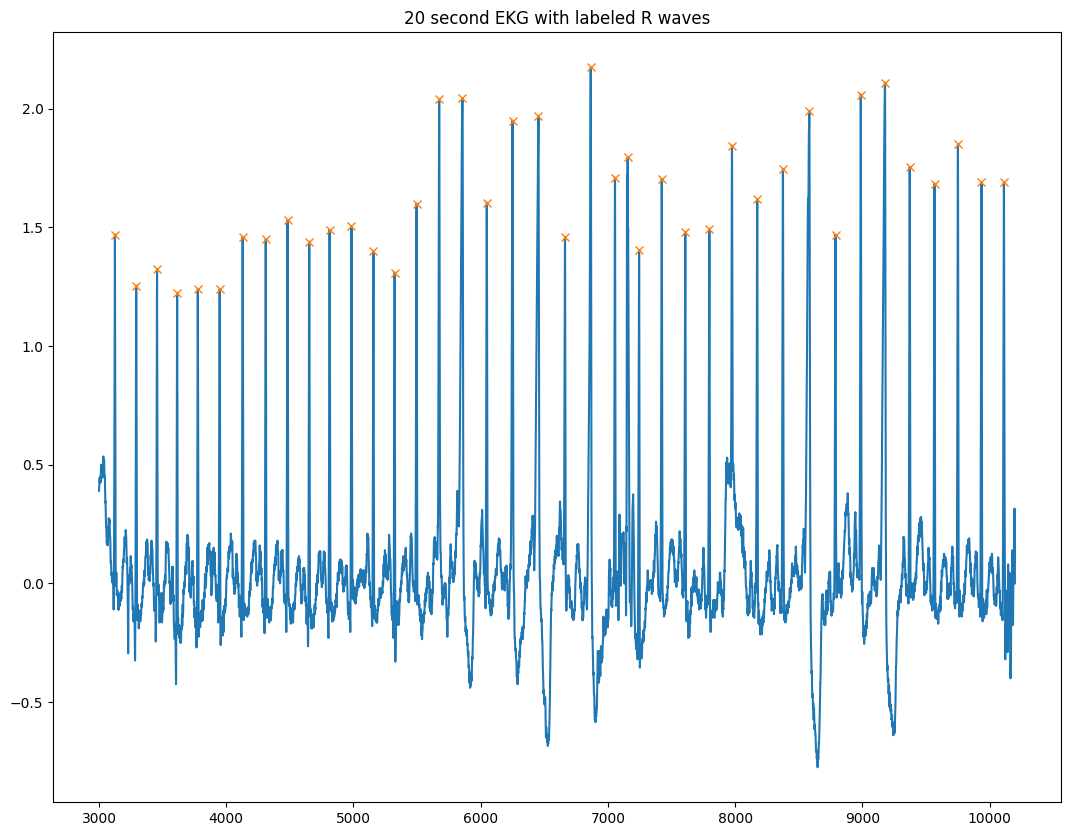

In [81]:
plt.figure(figsize=(13, 10))

flattened_ekg.plot()
plt.plot(r_waves, flattened_ekg[r_waves], "x")
plt.title("20 second EKG with labeled R waves")

In [82]:
frequency = 360
seconds = 20
heartbeats = len(r_waves)
heartbeats

40

Text(0.5, 1.0, 'The whole 5-minute dataset')

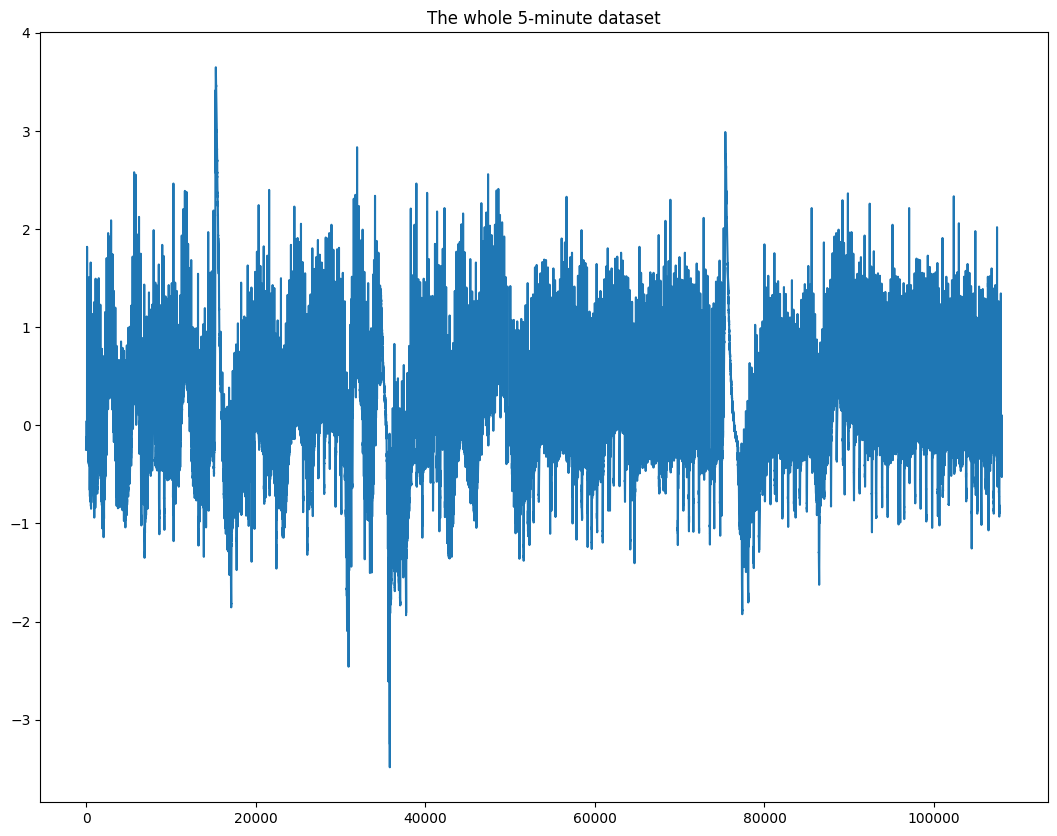

In [84]:
plt.figure(figsize=(13, 10))

ekg.plot()
plt.title("The whole 5-minute dataset")

Text(0.5, 1.0, '3 QRS complexes')

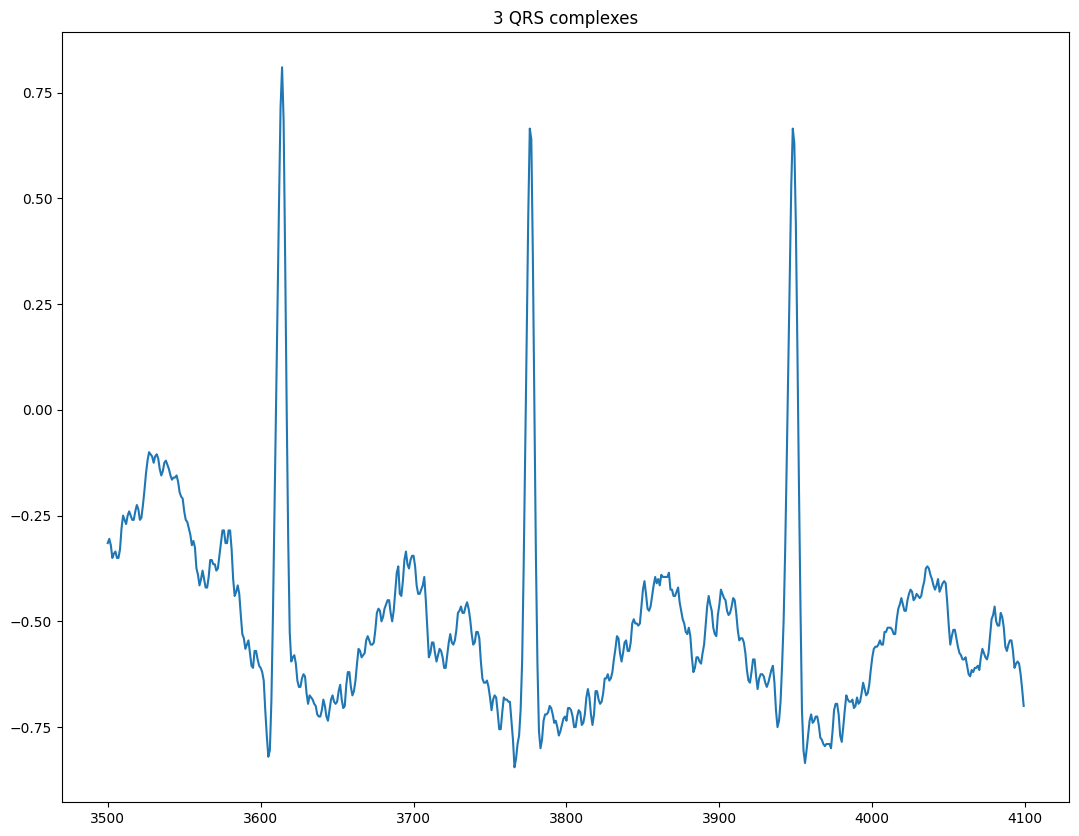

In [85]:
plt.figure(figsize=(13, 10))

ekg[3500:4100].plot()
plt.title("3 QRS complexes")

In [86]:
three_qrs = ekg[3500:4100]
r_waves, metadata = scipy.signal.find_peaks(three_qrs, height=0.5)
r_waves += 3500
r_waves

array([3614, 3776, 3948])

Text(0.5, 1.0, '3 heartbeats with labeled R waves')

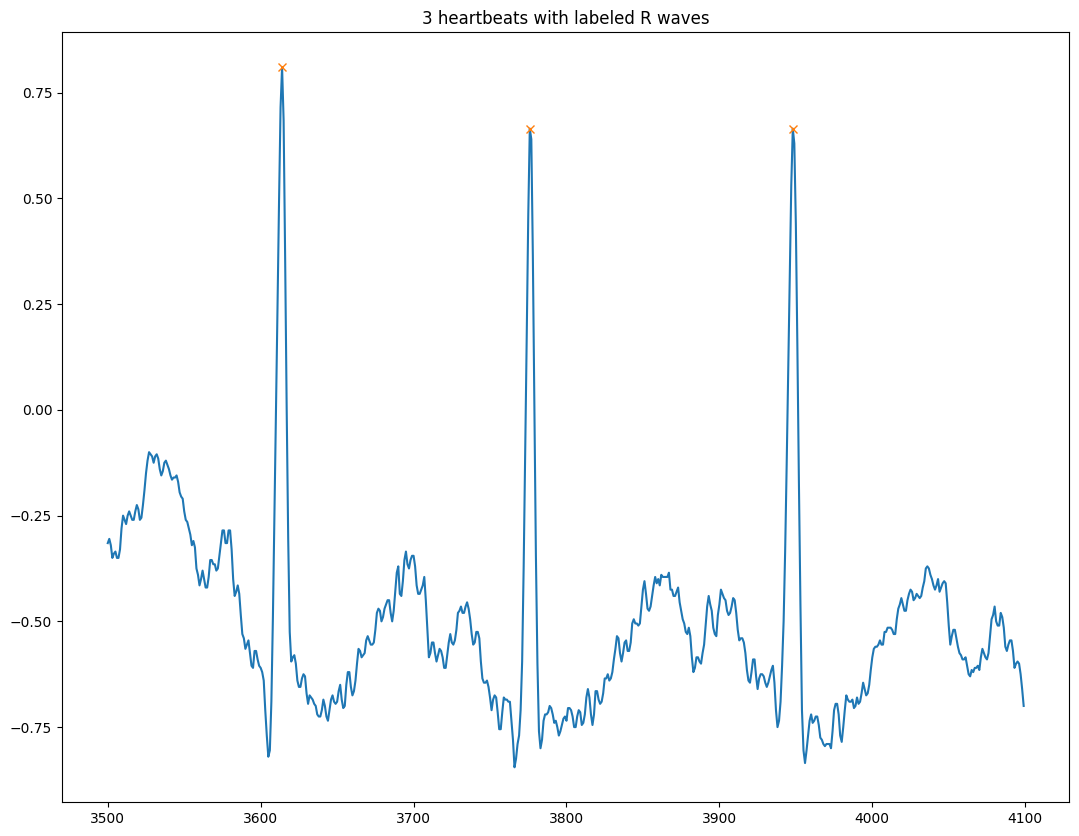

In [87]:
# Plot the 3 heartbeats with labeled R waves
plt.figure(figsize=(13, 10))
three_qrs.plot()
plt.plot(r_waves, three_qrs[r_waves], "x")
plt.title("3 heartbeats with labeled R waves")

Text(0.5, 1.0, 'Smoothed heartbeats')

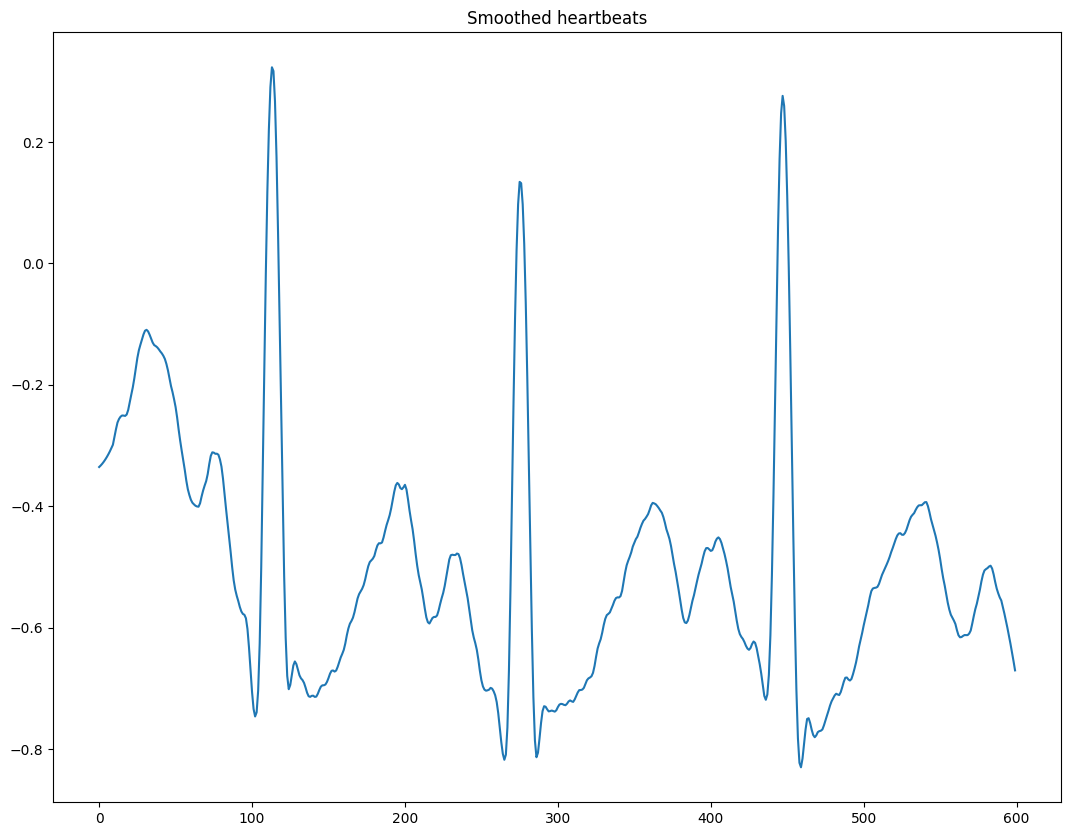

In [88]:
smoothed_heartbeats = scipy.signal.savgol_filter(three_qrs, window_length=20, polyorder=2)

plt.figure(figsize=(13, 10))
pd.Series(smoothed_heartbeats).plot()
plt.title("Smoothed heartbeats")

Text(0.5, 1.0, 'An R-R Interval')

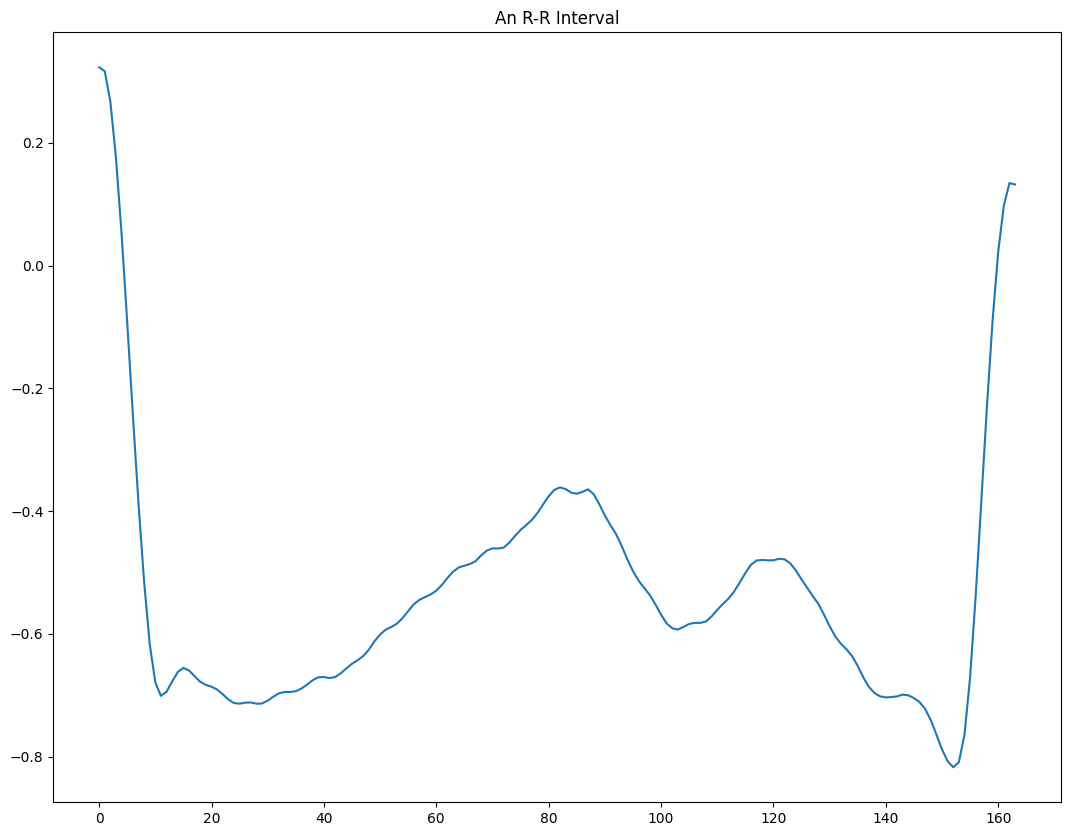

In [89]:
rr_interval = smoothed_heartbeats[113:277]
rr_interval = pd.Series(rr_interval)

plt.figure(figsize=(13, 10))
rr_interval.plot()
plt.title("An R-R Interval")

In [90]:
waves, metadata = scipy.signal.find_peaks(rr_interval, height=[-0.6, -0.2], distance=30)
waves
t_wave = waves[0] # first item
p_wave = waves[-1] # last item

Text(0.5, 1.0, 'RR Interval with P and T Waves Labeled')

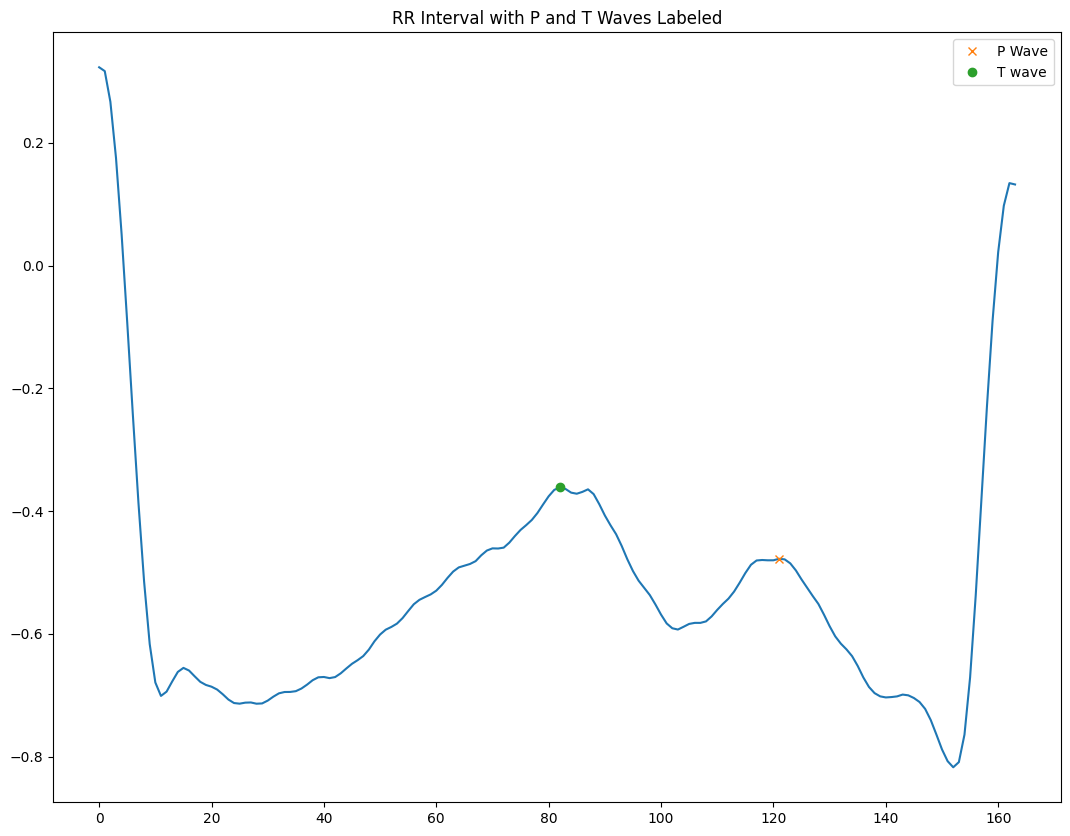

In [91]:
plt.figure(figsize=(13, 10))

rr_interval.plot()
plt.plot(p_wave, rr_interval[p_wave], "x", label="P Wave")
plt.plot(t_wave, rr_interval[t_wave], "o", label="T wave")
plt.legend()
plt.title("RR Interval with P and T Waves Labeled")